## Unhappy Employees - Examining Why Australians Quit Their Jobs in Education

### Introduction and Objectives

The objective of this project is to identify trends in exit surveys to understand which employees leave their jobs in education due to dissatisfaction. The data used here are exit surveys coming from two different sources: Department of Education, Training and Employment (DETE), and the Technical and Further Education (TAFE) institute. The raw data sets from DETE and TAFE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey), respectively. 

Although both sources use the same survey template, one of them customized some of the answers. Therefore, the datasets must be combined and cleaned before any comparative analyses can be carried out.

The questions we aim to answer through the following analysis are:

i) are employees who worked at the institutes for a short period of time resigning due to dissatisfaction? How does this compare to those who have been employed longer?

ii) are younger employees resigning due to dissatisfaction? How does this compare to older employees?

iii) how many people in each age group resigned due to some king of dissatisfaction?

iv) how many people in each stage of their career resigned due to some kind of dissatisfaction?

---

The data has been pre-loaded into sesparate csv formats (dete_survey.csv and tafe_survey.csv). Below is a description of some of the relevant columns both data sets.

`dete_survey.csv`: <br>

`ID`: Identification number of the participant survey<br>
`SeparationType`: The reason why the person's employment ended<br>
`Cease Date`: The year or month the person's employment ended <br>
`DETE Start Date`: The year the person began employment with DETE

`tafe_survey.csv`: <br>
`Record ID`: Identification number of the participant survey<br>
`Reason for ceasing employment`: The reason why the person's employment ended<br>
`LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

---


### Explore the data

First, let's setup libraries needed, and read/display some information about each dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# read in datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# display information about each dataset
print('DETE survey information:')
print('------------------------')
print(dete_survey.info())
print('------------------------')
print('TAFE survey information:')
print('------------------------')
print(tafe_survey.info())

DETE survey information:
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  


In [2]:
print('DETE survey information:')
print('------------------------')
dete_survey.head(5)

DETE survey information:
------------------------


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
print('TAFE survey information:')
print('------------------------')
tafe_survey.head(5)

TAFE survey information:
------------------------


,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There are few important points that we can draw from this quick examination of the data that will help form a plan to clean and combine the data:

i) Both datasets contain many columns that we will not need for the analysis.

ii) Most entries in the DETE dataset are either boolean or string entries. 

iii) The cease date is in the DETE survey is generally in MM/YYYY format, though some are in YYYY format, whereas the start date is in YYYY format. This makes it difficult to determine length of employment on a scale finer than years. In the TAFE dataset, the cease date is a float (YYYY.0), and does not include the start date. However, in the survey the employees were asked for length of service, which could be used to workout a start date. 

iv) The dete_survey dataset contains `Not Stated` values, and are not represented as `NaN`.

v) Each dataframe contains the same information, but the column names are different.

vi) There are many columns in the TAFE dataset that contain information about the reason for leaving.

Since we are most interested in age groups, job types, and duration of employment, let's look at those categories in greater detail.

In [4]:
#dete_survey['Age'].value_counts()
dete_survey['Cease Date'].value_counts()
#dete_survey['SeparationType'].value_counts()
#dete_survey['DETE Start Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
02/2014         2
07/2014         2
08/2012         2
04/2013         2
04/2014         2
07/2006         1
11/2012         1
07/2012         1
2014            1
2010            1
09/2010         1
09/2014         1
Name: Cease Date, dtype: int64

In [5]:
#tafe_survey['CurrentAge. Current Age'].value_counts()
tafe_survey['CESSATION YEAR'].value_counts()
#tafe_survey['Reason for ceasing employment'].value_counts()
#tafe_survey['LengthofServiceCurrent. Length of Service at current workplace'].value_counts()

2011.0    268
2012.0    235
2010.0    103
2013.0     85
2009.0      4
Name: CESSATION YEAR, dtype: int64

The age groups are mostly similar between the two data sets, but the entries are in different formats. The TAFE survey caps the maximum age bin to 56 or older, which is the most frequent category, compared to the DETE survey which caps the age at 61 or older.

The DETE survey includes more options for employee resignation compared to TAFE, along with a few other options such as 'Ill Health Retirement' and 'Other'. Therefore, we may need to exlcude the unique categories that don't allow for a comparison between the two institutes. This information is contained in other columns, which could be combined, or we could merge the resignation options in DETE to have the same granularity as in the TAFE survey.

---

### Cleaning the data
To start, lets handle the `NaN` values and drop the columns not needed for analysis.

In [6]:
# re-read the dete_survey dataset but specifying 'Not Stated' as 'NaN'
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

# drop columns
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66], axis = 1)

dete_survey_updated.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
tafe_survey_updated.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Now let's give some attention to the column names. Each dataframe contains much of the same information, but the column names are different. Because we want to combine the datasets, we need to standardize the column names. Here, we will clean up the column names and rename a few to be more concise.

In [8]:
print('Original column names for DETE updated survey:')
dete_survey_updated.columns

Original column names for DETE updated survey:


Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [9]:
print('Original column names for TAFE updated survey:')
tafe_survey_updated.columns

Original column names for TAFE updated survey:


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [10]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()
print('Original column names for Dete updated survey:')
dete_survey_updated.columns

Original column names for Dete updated survey:


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
col_name_mapper = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }
tafe_survey_updated.rename(columns = col_name_mapper, inplace = True)
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

print('Updated column names for TAFE updated survey:')
tafe_survey_updated.columns

Updated column names for TAFE updated survey:


Index(['id', 'institute', 'workarea', 'cease_date', 'separationtype',
       'contributing_factors._career_move_-_public_sector_',
       'contributing_factors._career_move_-_private_sector_',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now that the columns of interest have a standardized name, let's be more selective in the data that we keep. Recall that we are interested in understanding the trend in dissatisfied employees who resigned based on age, duration of employment, and career stage. So we can filter data based on separationtype, which specifies which employees resigned. 

Note that the dete_survey contains three types of resignation classifications, and we will need to account for all three types to avoid losing data.

In [12]:
# view the unique values in separationtype column for each dataset
print(dete_survey_updated['separationtype'].value_counts())
tafe_survey['Reason for ceasing employment'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [13]:
# select only rows where the cause of termination was resignation
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()

tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# show first few rows of resignation dataframes
dete_resignations.head(5)
#tafe_resignations.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


Before cleaning and manipulating the data, we will check for major inconsistencies in the datasets. In particular, verifying that age and the start/end dates make sense.

In the case of start/end dates, we need to verify that the end date isn't before the start date, or after the current date. Moreover, given that most people in this field started working in their twenties, it would be unlikely that a start date would be before 1940. Let's verify both of these and ensure that the inconsistencies are few compared to the size of the data set.

First, clean the `cease_date` column in dete_resignations:

In [14]:
# print unique values in cease date for DETE
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [15]:
# convert to string, split based on '/'' and select last element 
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split("/").str.get(-1)
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float64')
# check new counts of resignations each year
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [16]:
# print unique values in cease date for TAFE
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Lets generate a boxplot to examine the values in each resignation date series:

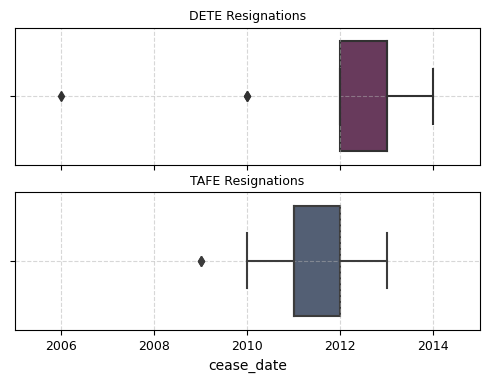

In [17]:
import seaborn as sns
f, axs = plt.subplots(2,1, figsize=(6,4),sharex=True)
sns.boxplot(x=dete_resignations['cease_date'], orient='h' , ax=axs[0], color = '#70325f')
sns.boxplot(x=tafe_resignations['cease_date'], orient='h' , ax=axs[1], color = '#4d5e7a')
axs[1].set_xlim([2005,2015])
axs[0].set_xlabel('')
axs[0].grid(True, alpha = 0.5, linestyle = '--')
axs[1].grid(True, alpha = 0.5, linestyle = '--')
axs[1].tick_params(axis='x', labelsize= 9)
axs[0].set_title('DETE Resignations', fontsize = 9)
axs[1].set_title('TAFE Resignations', fontsize = 9)
plt.show()

From the boxplots above we can see that the cease dates all seem reasonable, but the two do not span the same number of years. In particular, DETE resignations are concentrated between the years of 2012 and 2014, whereas TAFE resignations are mostly between 2010 and 2013. Neverthess, this should not be an issue in the following analysis since we are looking for relative trends.

---

### Feature generation

Recall that one of our key questions is whether or not employees who have been working for a short period of time are resigning due to some kind of dissatisfaction, and how that compares to employees who have been in their position for longer. The TAFE dataset contains a column of `institute_service`, which contains the duration of time in the job. This is not available in the DETE dataset, but it does include `DETE_start_date`, which can be used to compute years of service. Let's compute that first before moving on:

In [18]:
dete_resignations['dete_start_date'] = dete_resignations['dete_start_date'].astype('float64')
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()
# convert to float


5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

Now that we have `institute_service` computed for both datasets, we are almost ready to make comparisons. One final point to address is that service is not defined in the same way between data sets. The TAFE survey describes service in year ranges, whereas the recently computed values for DETE are in discrete years.

To make comparisons, we will convert our `institute_service` values into categories. We'll base the analysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which argues that using career stage, rather than age, is more informative for understanding an employee's needs. 

For this, we will use the following categories:<br>

i) New: less than 3 years at a company<br>
ii) Experienced: 3-6 years at a company<br>
iii) Established: 7-10 years at a company<br>
iv) Veteran: 11 or more years at a company<br>

Let's use this to assign service years into the appropriate category for both data sets.

In [19]:
# show value counts for tafe service years
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [20]:
# convert 'less than 1 year' and 'more than 20 years' into numbers
tafe_resignations.loc[tafe_resignations.institute_service == 'Less than 1 year', 'institute_service'] = '0-1'
tafe_resignations.loc[tafe_resignations.institute_service == 'More than 20 years', 'institute_service'] = '20-21'
tafe_resignations['institute_service'].value_counts()
#print(len(tafe_resignations))

0-1      73
1-2      64
3-4      63
5-6      33
11-20    26
7-10     21
20-21    10
Name: institute_service, dtype: int64

Lets split the text categories, only keeping the upper bound on the years of service, which should be sufficient for matching with our defined catgeories. There are 340 entries in the original dataframe, so we will use that number to verify that no entries are missing afterwards.

In [21]:
# convert to string and split based on dash
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype('str')
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].str.split("-").str.get(-1)
# convert to numeric value
tafe_resignations['institute_service'] = tafe_resignations['institute_service'].astype('float64')
tafe_resignations['institute_service'].value_counts()

#print(len(tafe_resignations))

1.0     73
2.0     64
4.0     63
6.0     33
20.0    26
10.0    21
21.0    10
Name: institute_service, dtype: int64

Next, we will create a function to map service years to career category:

In [22]:
def map_career_stage(x):
    if np.isnan(x):
        return np.nan
    elif x < 3:
        return 1
    elif x < 7: 
        return 2
    elif x < 11:
        return 3
    else:
        return 4

# apply mapping to both data sets
dete_resignations['service_cat'] = dete_resignations['institute_service'].apply(map_career_stage)
tafe_resignations['service_cat'] = tafe_resignations['institute_service'].apply(map_career_stage)
# check values in service_cat series
tafe_resignations['service_cat'].value_counts()
dete_resignations['service_cat'].value_counts()

4.0    100
2.0     76
1.0     56
3.0     41
Name: service_cat, dtype: int64

Now let's identify dissatisfied employees based on responses from the exit surveys. Below are the columns used in the respective surveys to identify a dissatisfied employee:

tafe_survey_updated:<br>
- `contributing_factors._dissatisfaction`
- `contributing_factors._job_dissatisfaction`

dete_survey_updated:<br>
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

We will create a new column called `dissatisfied` if any of the above values are True. We will create a column of True, False and NaN values for TAFE annd then convert to a numeric value. The DETE survey is already in True/False format.

In [23]:
bool_tafe = tafe_resignations['contributing_factors._job_dissatisfaction'] == 'Job Dissatisfaction'
bool_tafe_2 = tafe_resignations['contributing_factors._dissatisfaction'] == 'Contributing Factors. Dissatisfaction '

tafe_resignations['job_dissatisfaction_bool'] = bool_tafe
tafe_resignations['dissatisfaction_bool'] = bool_tafe_2

# select rows where either condition is true
tafe_resignations['dissatisfied'] = tafe_resignations[['dissatisfaction_bool','job_dissatisfaction_bool']].any(axis=1, skipna=False)
#display values
tafe_resignations['dissatisfied'].value_counts()

False    249
True      91
Name: dissatisfied, dtype: int64

Do the same for the DETE surveys:

In [24]:
dete_dissatisfaction_columns = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]
# select rows where either condition is true
dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_columns].any(axis=1, skipna=False)
#display values
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

### Combine data sets

What we want to do is aggregate the data based on `institute_service` so we will add a column to each data frame (dete_survey_updated, tafe_survey_updated) to specify which survey the response came from, and drop any remaining columns not needed for the analysis. We will then combine the results into one dataframe for aggregation.

In [25]:
dete_resignations.drop(columns = dete_dissatisfaction_columns, inplace = True)
dete_columns_to_drop = [
    'id',
    'region',
    'business_unit',
    'career_move_to_public_sector',
    'career_move_to_private_sector',
    'dete_start_date',
    'role_start_date',
    'interpersonal_conflicts',
    'maternity/family',
    'relocation',
    'classification',
    'study/travel',
    'ill_health',
    'traumatic_incident',
    'none_of_the_above',
    'torres_strait',
    'south_sea',
    'disability',
    'nesb',
    'aboriginal'
]
dete_resignations.drop(columns = dete_columns_to_drop, inplace = True)

In [26]:
tafe_columns_to_drop = [
    'id',
    'workarea',
    'institute',
    'contributing_factors._career_move_-_public_sector_',
    'contributing_factors._career_move_-_private_sector_',
    'contributing_factors._career_move_-_self-employment',
    'contributing_factors._ill_health',
    'contributing_factors._maternity/family',
    'contributing_factors._dissatisfaction',
    'contributing_factors._job_dissatisfaction',
    'contributing_factors._interpersonal_conflict',
    'contributing_factors._study', 'contributing_factors._travel',
    'contributing_factors._other', 'contributing_factors._none',
    'role_service',
    'job_dissatisfaction_bool',
    'dissatisfaction_bool',
    
]
tafe_resignations.drop(columns = tafe_columns_to_drop, inplace = True)

Check for null values:

In [27]:
dete_resignations.isnull().sum()

separationtype        0
cease_date           11
position              3
employment_status     4
gender                9
age                   5
institute_service    38
service_cat          38
dissatisfied          0
dtype: int64

In [28]:
tafe_resignations.isnull().sum()

cease_date            5
separationtype        0
gender               50
age                  50
employment_status    50
position             50
institute_service    50
service_cat          50
dissatisfied          0
dtype: int64

Create column in both datasets indicating which survey it came from and combine into one dataframe:

In [29]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)

### Preliminary analysis

We will now perform data aggregations and determine the answeres to the questions posed at the start of the notebook.

---

Q1: are employees who worked at the institutes for a short period of time resigning due to dissatisfaction? How does this compare to those who have been employed longer?

Q4: how many people in each stage of their career resigned due to some kind of dissatisfaction?

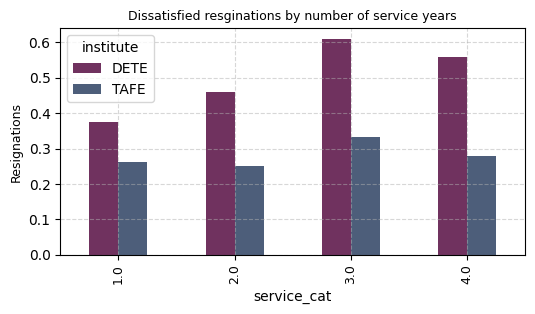

In [55]:
# group by service category and count number of dissatisfied resignations
f, ax = plt.subplots(1,1, figsize=(6,3))
combined.groupby(['service_cat','institute'])['dissatisfied'].mean().unstack().plot.bar(ax = ax, color = ['#70325f','#4d5e7a'])
ax.set_alpha(0.8)
ax.grid(True, alpha = 0.5, linestyle = '--')
ax.tick_params(axis='x', labelsize= 9)
ax.set_title('Dissatisfied resginations by number of service years', fontsize = 9)
ax.set_ylabel('Resignations', fontsize = 9);

plt.show()

When considering institution, DETE has a higher employee dissatisfaction across all service categories. In general, established and verteran employees (more than 7 years experience) have a greater proportion of residnations due to dissatisfaction and on average, about 40% of resignations are due to dissatisfied employees across all experience levels.

Q2: are younger employees resigning due to dissatisfaction? How does this compare to older employees?

Q3: how many people in each age group resigned due to some king of dissatisfaction?

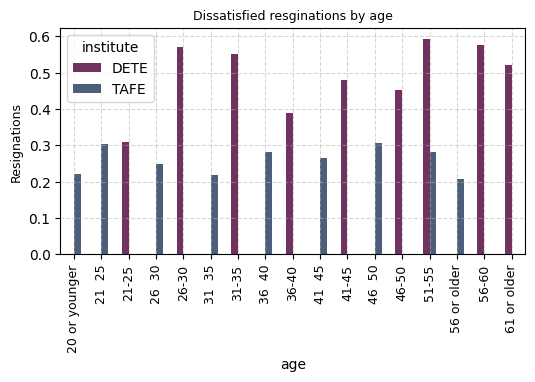

In [56]:
f, ax = plt.subplots(1,1, figsize=(6,3))
combined.groupby(['age','institute'])['dissatisfied'].mean().unstack().plot.bar(ax = ax, color = ['#70325f','#4d5e7a'])
ax.set_alpha(0.8)
ax.grid(True, alpha = 0.5, linestyle = '--')
ax.tick_params(axis='x', labelsize= 9)
ax.set_title('Dissatisfied resginations by age', fontsize = 9)
ax.set_ylabel('Resignations', fontsize = 9);

plt.show()

We didn't devote attention to standardizing the age categories like we did with years of expereience, however, we can still see interesting trends with from the raw data. The rate of dissatisfaction in resigning employees appears to increase significantly at DETE for employees older than 25. The highest rate of dissatsifaction is for people aged 26-35 and 51 and older. Similar to the Q1, the rates of dissatisfaction at TAFE are lower, but show slightly different trends. The highest rate of dissatisfaction at TAFE is for younger employees (21-25), and then this decreases until above the age of 36 where the dissatisfaction rate is more-or-less constant until the age of 56 or older. This correpsonds to the age group where people are more likely to retire, and this may change their inclination to complain about issues on the job as a reason for resigning.

---

### Conclusions

From this preliminary analysis of the data we can extract the following general conclusions:

- Worker dissatisfaction rates are higher at DETE than at TAFE;<br>

- Employees who are more experienced have a higher proportion of resignations due to some kind of job dissatisfaction, and<br>

- The rate of dissatisfaction with age is less clear, but in general, dissatisfaction appears to be higher among employees who are between the ages of 26-35 and over the age of 51.<br>

---

In this project we covered the following tasks:

- Explored the data and figured out how to prepare it for analysis <br>
- Dropped any data not needed for our analysis <br>
- Verified the quality of our data <br>
- Created a new feature called 'service_cat' that categorizes employees based on experience level/career stage rather than years of service <br>
- Created a new column indicating if an employee resigned because they were dissatisfied in some way <br>
- Combined the data from both institutes into a single dataframe
- Performed some basic analysis on the proprotions of dissatisfied employees who resigned